# Explore Binance BTCUSDT Dataset

This notebook explores the `/tmp/BTCUSDT-1s-2024-05.csv` dataset used in the Airflow pipeline. It loads the data, displays its structure, summary statistics, and visualizations.

## 1. Download and Load Dataset



## Download Dataset from `https://data.binance.vision`

In [2]:
!wget -O /tmp/BTCUSDT-1s-2025-09.zip "https://data.binance.vision/data/spot/monthly/klines/BTCUSDT/1s/BTCUSDT-1s-2025-09.zip"
!unzip -p /tmp/BTCUSDT-1s-2025-09.zip > /tmp/BTCUSDT-1s-2025-09.csv

--2025-10-07 12:57:52--  https://data.binance.vision/data/spot/monthly/klines/BTCUSDT/1s/BTCUSDT-1s-2025-09.zip
Resolving data.binance.vision (data.binance.vision)... 3.167.183.59, 3.167.183.47, 3.167.183.79, ...
Connecting to data.binance.vision (data.binance.vision)|3.167.183.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69320841 (66M) [application/zip]
Saving to: ‘/tmp/BTCUSDT-1s-2025-09.zip’

/tmp/BTCUSDT-1s-202 100%[===================>]  66.11M  21.9MB/s    in 3.0s    

2025-10-07 12:57:55 (21.9 MB/s) - ‘/tmp/BTCUSDT-1s-2025-09.zip’ saved [69320841/69320841]



## Load dataset
Load the Binance BTCUSDT 1s kline CSV file from `/tmp/BTCUSDT-1s-2025-09.csv`.

In [3]:
import pandas as pd
import os

csv_path = '/tmp/BTCUSDT-1s-2025-09.csv'
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path, header=None)
    df.columns = [
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
    ]
    print('Loaded dataset with shape:', df.shape)
    display(df.head())
else:
    print('Dataset not found at', csv_path)

Loaded dataset with shape: (2592000, 12)


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1756684800000000,108246.36,108246.36,108246.36,108246.36,0.00923,1756684800999999,999.113903,7,0.00923,999.113903,0
1,1756684801000000,108246.36,108246.36,108240.51,108240.51,0.75221,1756684801999999,81423.944310,97,0.01340,1450.497889,0
2,1756684802000000,108240.51,108240.51,108240.50,108240.51,0.00414,1756684802999999,448.115705,5,0.00346,374.512165,0
3,1756684803000000,108240.51,108240.51,108240.50,108240.50,0.34159,1756684803999999,36973.874118,15,0.17226,18645.510253,0
4,1756684804000000,108240.51,108240.51,108240.50,108240.51,0.02172,1756684804999999,2350.983850,9,0.01900,2056.569690,0


## 2. Explore Dataset Structure

View columns, data types, and a sample of the data.

In [4]:
if 'df' in globals():
    print('Columns:', df.columns.tolist())
    print('Data types:')
    print(df.dtypes)
    display(df.sample(5))

Columns: ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
Data types:
open_time                         int64
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                        int64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
ignore                            int64
dtype: object


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
654824,1757339624000000,112044.89,112044.89,111950.80,111950.80,14.59008,1757339624999999,1.634167e+06,868,0.00701,785.430584,0
675557,1757360357000000,112100.00,112100.00,112100.00,112100.00,0.02702,1757360357999999,3.028942e+03,3,0.00000,0.000000,0
1549654,1758234454000000,117264.48,117274.24,117264.47,117274.24,4.88600,1758234454999999,5.729590e+05,368,4.88570,572923.797016,0
716363,1757401163000000,113042.56,113042.56,113042.56,113042.56,0.00090,1757401163999999,1.017383e+02,1,0.00000,0.000000,0
383232,1757068032000000,112223.12,112223.12,112223.12,112223.12,0.02800,1757068032999999,3.142247e+03,1,0.00000,0.000000,0


## 3. Display Summary Statistics

Show summary statistics for numeric columns.

In [5]:
if 'df' in globals():
    display(df.describe())

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2.592000e+06,2592000.0
mean,1.757981e+15,1.129755e+05,1.129760e+05,1.129750e+05,1.129755e+05,1.445031e-01,1.757981e+15,1.630398e+04,2.494517e+01,6.934134e-02,7.824177e+03,0.0
std,7.482461e+11,2.515638e+03,2.515541e+03,2.515733e+03,2.515636e+03,9.153237e-01,7.482461e+11,1.033364e+05,7.694893e+01,6.114138e-01,6.909724e+04,0.0
min,1.756685e+15,1.072550e+05,1.072554e+05,1.072550e+05,1.072550e+05,0.000000e+00,1.756685e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.757333e+15,1.109281e+05,1.109290e+05,1.109270e+05,1.109281e+05,7.700000e-04,1.757333e+15,8.705415e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.757981e+15,1.127148e+05,1.127156e+05,1.127140e+05,1.127148e+05,5.800000e-03,1.757981e+15,6.549012e+02,3.000000e+00,6.800000e-04,7.732381e+01,0.0
75%,1.758629e+15,1.154782e+05,1.154785e+05,1.154778e+05,1.154782e+05,4.082000e-02,1.758629e+15,4.618603e+03,6.000000e+00,7.000000e-03,7.913283e+02,0.0
max,1.759277e+15,1.179000e+05,1.179000e+05,1.179000e+05,1.179000e+05,1.717142e+02,1.759277e+15,1.952118e+07,4.979000e+03,1.206293e+02,1.411406e+07,0.0


## 4. Visualize Dataset Features

Plot price and volume trends.

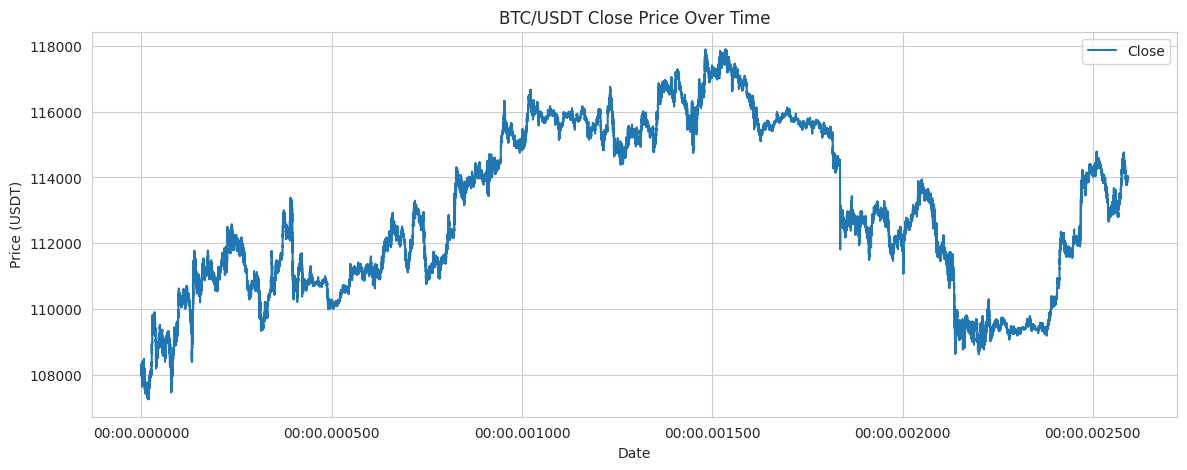

In [10]:
#  Plot close price
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

plt.figure()
plt.plot(df['close'], label='Close')
plt.title('BTC/USDT Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


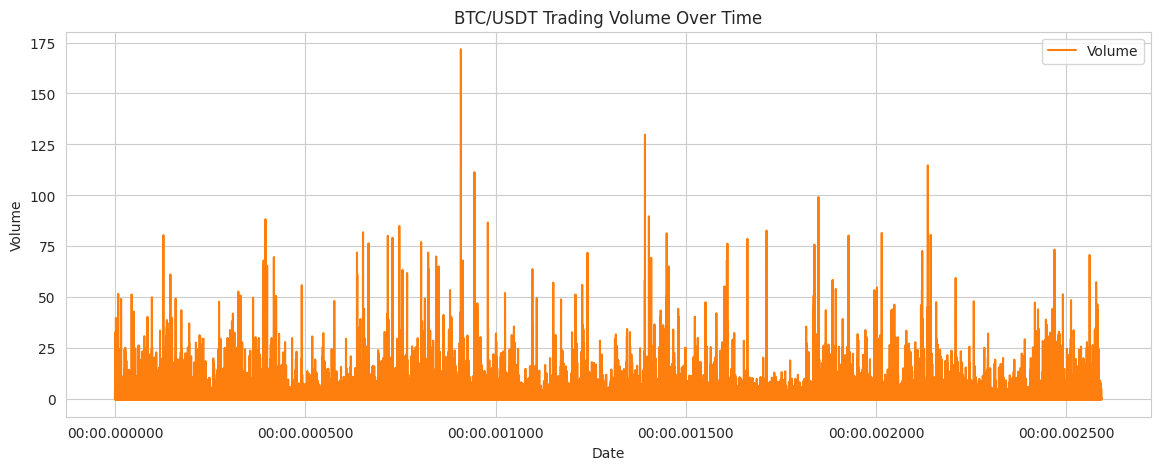

In [11]:
# Plot volume
plt.figure()
plt.plot(df['volume'], color='tab:orange', label='Volume')
plt.title('BTC/USDT Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


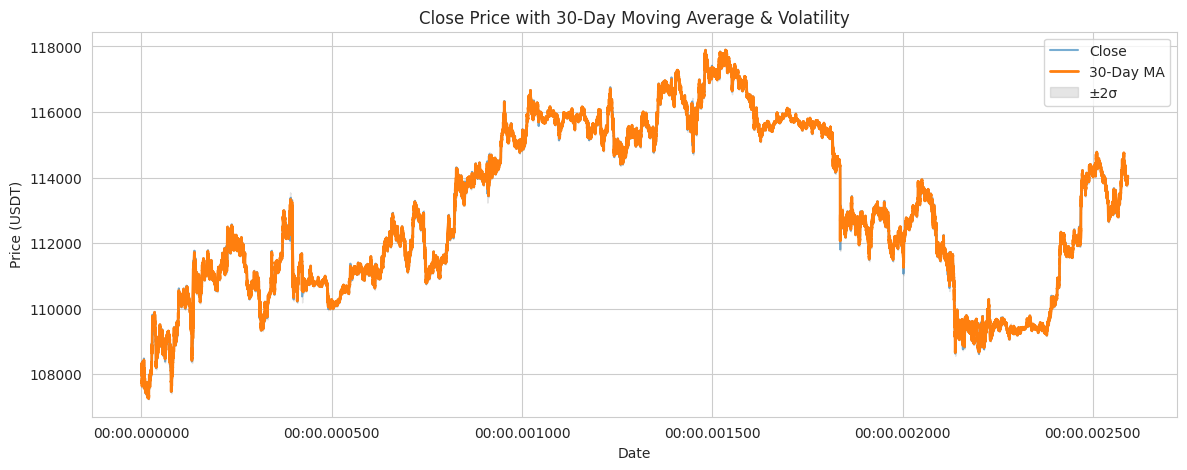

In [ ]:
# Moving average & volatility bands
window = 30
df['MA30'] = df['close'].rolling(window).mean()
df['MA30_std'] = df['close'].rolling(window).std()

plt.figure()
plt.plot(df['close'], label='Close', alpha=0.6)
plt.plot(df['MA30'], label='30‑Day MA', linewidth=2)
plt.fill_between(df.index,
                 df['MA30'] - 2 * df['MA30_std'],
                 df['MA30'] + 2 * df['MA30_std'],
                 color='gray', alpha=0.2, label='±2σ')
plt.title('Close Price with 30‑Day Moving Average & Volatility')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


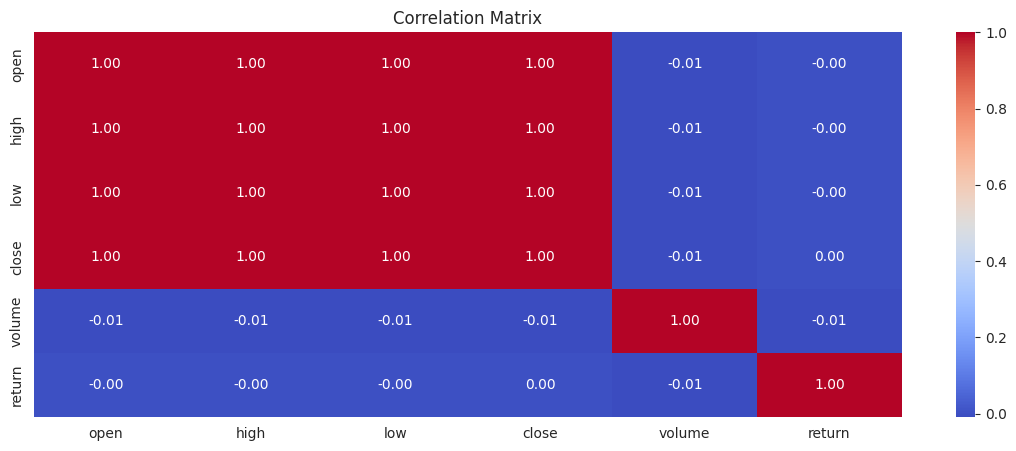

In [14]:
# Compute daily returns first
df['return'] = df['close'].pct_change()

# Now build the correlation matrix
corr = df[['open', 'high', 'low', 'close', 'volume', 'return']].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


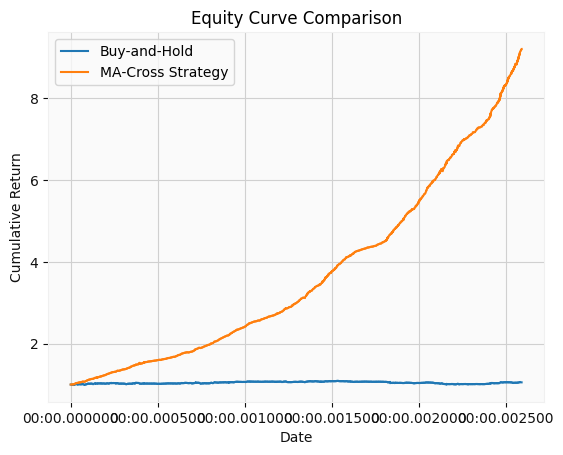

In [ ]:
# Simple MA‑crossover strategy back‑test
df['MA7'] = df['close'].rolling(7).mean()
df['MA30'] = df['close'].rolling(30).mean()
df['signal'] = (df['MA7'] > df['MA30']).astype(int)   # 1 = long, 0 = cash

# Strategy returns (apply signal on next day)
df['strategy_ret'] = df['signal'].shift(1) * df['return']

# Cumulative equity curves
df['cum_market'] = (1 + df['return']).cumprod()
df['cum_strategy'] = (1 + df['strategy_ret']).cumprod()

plt.figure()
plt.plot(df['cum_market'], label='Buy‑and‑Hold')
plt.plot(df['cum_strategy'], label='MA‑Cross Strategy')
plt.title('Equity Curve Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
